In [2]:
import convokit
from convokit import Corpus, download, FightingWords

In [5]:
corpus = Corpus(filename=download('reddit-corpus-small'))

Dataset already exists at /Users/calebchiam/Documents/GitHub/Cornell-Conversational-Analysis-Toolkit/convokit/tensors/reddit-corpus-small


Let's get the fighting words for r/Christianity and r/atheism:

In [6]:
fw = FightingWords(ngram_range=(1,1))

Initializing default CountVectorizer with ngram_range (1, 1)... Done.


In [7]:
fw.fit(corpus, class1_func=lambda utt: utt.meta['subreddit'] == 'Christianity', 
               class2_func=lambda utt: utt.meta['subreddit'] == "atheism",)

class1_func returned 2659 valid corpus components. class2_func returned 2736 valid corpus components.
Vocab size is 2054
Comparing language...
ngram zscores computed.


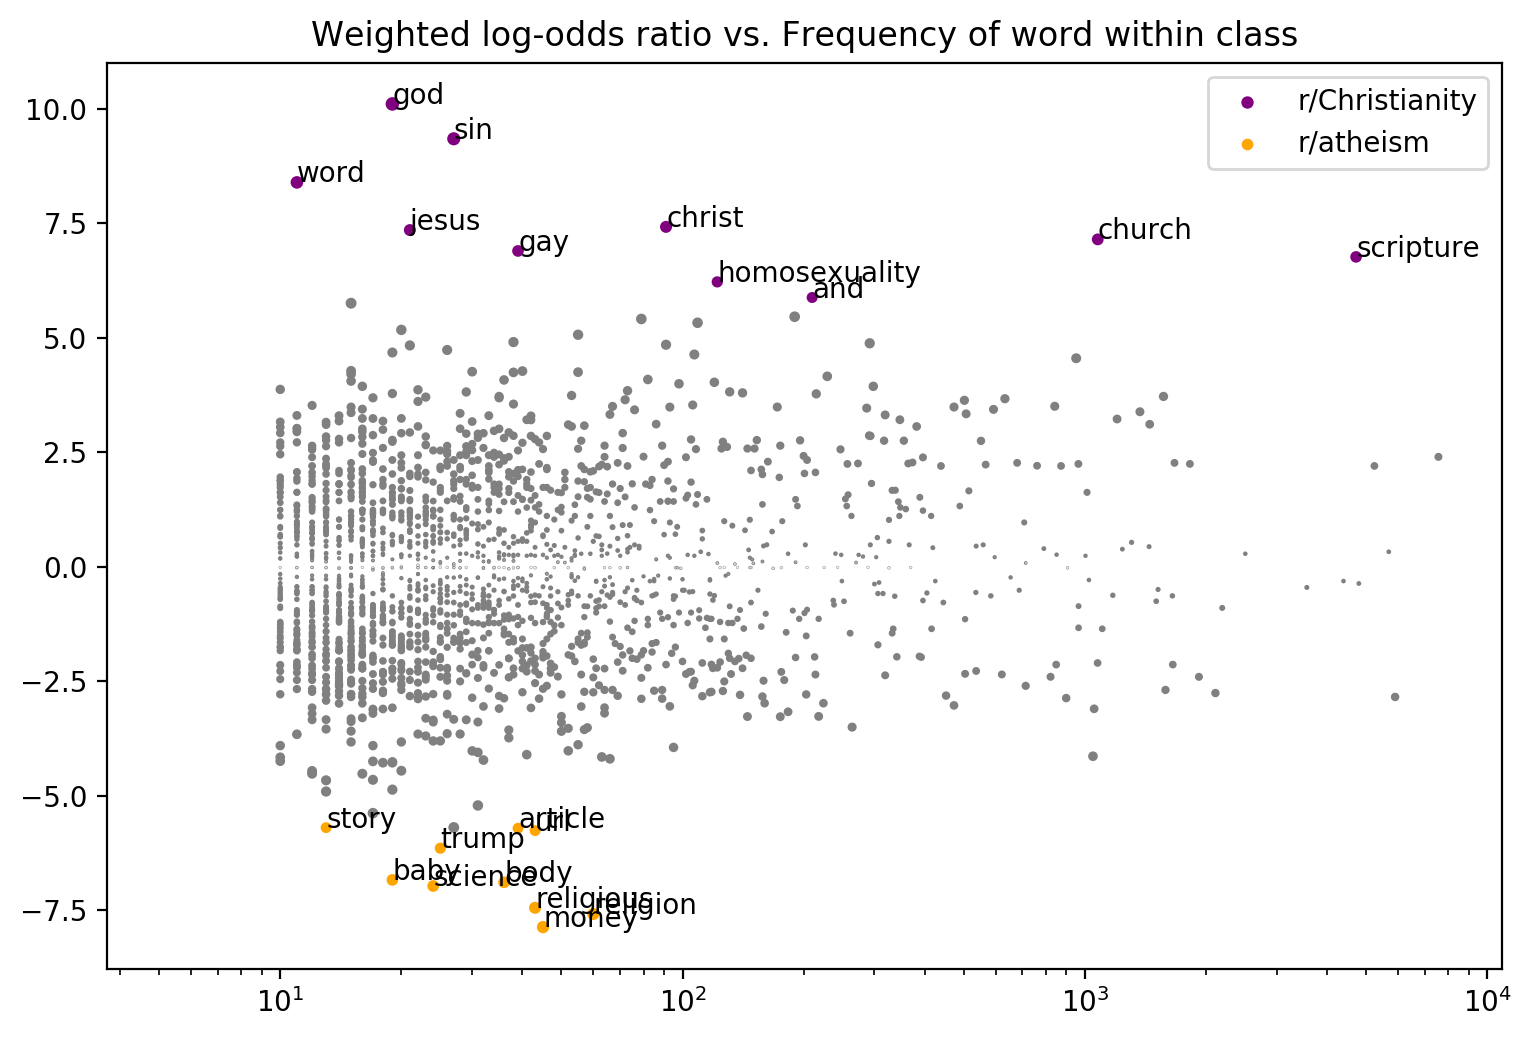

In [10]:
df = fw.summarize(corpus, plot=True, class1_name='r/Christianity', class2_name='r/atheism')

In [11]:
df

,z-score,class
ngram,,
money,-7.869706,r/atheism
religion,-7.583862,r/atheism
religious,-7.448927,r/atheism
science,-6.973271,r/atheism
body,-6.891924,r/atheism
baby,-6.839824,r/atheism
trump,-6.147888,r/atheism
url,-5.763271,r/atheism
article,-5.711645,r/atheism


In [13]:
c1, c2 = fw.get_ngrams_past_threshold(threshold=1)

In [14]:
c1[:10]

['god',
 'sin',
 'word',
 'christ',
 'jesus',
 'church',
 'gay',
 'scripture',
 'homosexuality',
 'and']

In [15]:
df.head()

,z-score,class
ngram,,
money,-7.869706,r/atheism
religion,-7.583862,r/atheism
religious,-7.448927,r/atheism
science,-6.973271,r/atheism
body,-6.891924,r/atheism


In [16]:
df.tail(10)

,z-score,class
ngram,,
and,5.878452,r/Christianity
homosexuality,6.219228,r/Christianity
scripture,6.764903,r/Christianity
gay,6.894390,r/Christianity
church,7.147289,r/Christianity
jesus,7.350807,r/Christianity
christ,7.420763,r/Christianity
word,8.391863,r/Christianity
sin,9.344141,r/Christianity


In [14]:
# Words that are more typical of r/Christianity

In [15]:
fw.get_zscore("love")

5.458235491414579

In [16]:
fw.get_zscore("forgive")

2.0362185312810253

In [17]:
fw.get_zscore("repent")

3.2087981017819183

In [18]:
fw.get_zscore("marriage")

2.3709572119803486

In [19]:
# Words that are more typical of r/atheism

In [20]:
fw.get_zscore("government")

-4.280239914371208

In [21]:
fw.get_zscore("state")

-3.5911735907573004

In [22]:
fw.get_zscore("separation")

-2.0834134084794282

In [23]:
fw.get_zscore('education')

-3.8053148701485986

In [24]:
fw.get_zscore('morals')

-2.2769976481460232

In [17]:
fw.transform(corpus, config={'annot_method': 'top_k', 'top_k': 10})

In [18]:
list(fw.get_top_k_ngrams()[0])

['god',
 'sin',
 'word',
 'christ',
 'jesus',
 'church',
 'gay',
 'scripture',
 'homosexuality',
 'and']

In [19]:
for utt in corpus.iter_utterances():
    if utt.meta["subreddit"] in ["atheism", "Christianity"]:
        if len(utt.meta['fighting_words_class1']) > 0:
            print(utt.meta['subreddit'])
            print(utt.meta['fighting_words_class1'])
            print(utt.meta['fighting_words_class2'])
            print(utt.text)
            break

Christianity
['sin', 'church', 'and']
['religion', 'religious']
Parents are strict, Orthodox and religious. Father is a priest. I was born in a country where the majority were Orthodox so I've grown up with faith. We moved to American a decade ago and it's been the same since.


But now, I feel so disillusioned. I feel so guilty about this but I simply don't believe in God like I used to. I despise going to church because of how strict it is. My whole family has to get up at 4am and attend church from 5am-10am. Not only that, but we have to stand 95% of the time. Every Sunday, I'm exhausted, bored out of my mind because it's in a language I don't understand and self conscious whenever I sit.


I don't know if it's just me losing faith or if I just *really* dislike my church environment. What I wouldn't give to go to a church in the afternoon or late morning with a 2 hour service where I could sit....but I can't even bring it up to my parents because they would 110% take it as a betraya